<a href="https://colab.research.google.com/github/MuhammadAbdullah80/Velocity-Solutions/blob/main/Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🧩 Step 1 – Loading the MNIST Dataset



We used the built-in `tensorflow.keras.datasets` module to load the MNIST dataset. It contains **70,000 grayscale images** of handwritten digits (0–9), each of size 28×28 pixels.


#### 📌 What I Learned:
- How to load a popular dataset using TensorFlow.
- `x_train` and `x_test` are arrays of images.
- `y_train` and `y_test` are arrays of corresponding digit labels (0–9).



In [2]:
from tensorflow.keras.datasets import mnist

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Check shapes
print("Training data:", x_train.shape)
print("Training labels:", y_train.shape)
print("Test data:", x_test.shape)
print("Test labels:", y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data: (60000, 28, 28)
Training labels: (60000,)
Test data: (10000, 28, 28)
Test labels: (10000,)


# 🧩 Step 2 – Data Visualization and Preprocessing



In this step, I visualized the MNIST images and prepared the data for use with machine learning models.

---

#### 🔍 Sample Visualization

To get familiar with the dataset, I displayed a few sample images from the training data. This helped me understand how the handwritten digits look and verify that the data was loaded correctly.

---

#### ⚙️ Data Preprocessing

1. **Normalization**  
   Pixel values originally range from 0 to 255. I scaled them down to a 0–1 range to ensure more stable and faster model training. This step also avoids issues where certain pixel values dominate due to their larger scale.

2. **Flattening**  
   Each image in the dataset is 28×28 pixels. I converted these into 1D vectors of length 784 so that models like k-Nearest Neighbors and Support Vector Machines can process them.

---

#### 🧾 Output:

```
Flattened training data: (60000, 784)
```

---

#### 📌 What I Learned:

- Normalizing pixel values improves model performance and speeds up training.
- Flattening 2D images into 1D vectors is necessary for non-CNN models.
- Visualization helps build intuition about the dataset before model development.



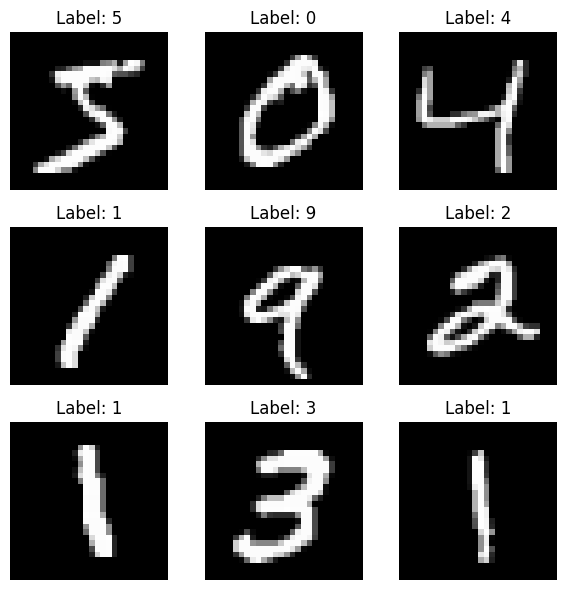

In [3]:
import matplotlib.pyplot as plt

# Show first 9 images
plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [4]:
# 1. Normalize pixel values to 0–1
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

# 2. Flatten 28x28 images to 1D (for non-CNN models like kNN or SVM)
x_train_flat = x_train_norm.reshape(-1, 28*28)
x_test_flat = x_test_norm.reshape(-1, 28*28)

print("Flattened training data:", x_train_flat.shape)


Flattened training data: (60000, 784)


# ⚙️ STEP 3 - Training a k-Nearest Neighbors (kNN) or Support Vector Machine (SVM) model

## Classification with k-Nearest Neighbors (kNN)

In this step, I implemented and trained a **k-Nearest Neighbors (kNN)** model to classify handwritten digits from the MNIST dataset.

---

#### ⚙️ Model Used:  
**k-Nearest Neighbors (kNN)** — a simple, instance-based learning algorithm that predicts the class of a data point based on the majority class of its k nearest neighbors.

---

#### 🧪 Setup:
- Used only the first **10,000 training images** (instead of all 60,000) for faster runtime.
- Flattened each 28×28 image into a 784-dimensional vector.
- Set `k = 3` (used 3 nearest neighbors to make predictions).

---

#### 📊 Results:
- Achieved an accuracy of around **94.6%** on the test set.
- Classification report showed strong performance across all digits.
- Observed that smaller `k` values can be more sensitive to noise, while larger values can smooth out results but may miss fine details.

---

#### 📌 What I Learned:
- kNN is easy to implement but **computationally expensive at prediction time**.
- Works well on small-to-medium datasets, especially when classes are well-separated.
- Choosing the right value of **k** is crucial for balancing bias and variance.



In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# 1. Use a smaller training subset for speed
x_train_sample = x_train_flat[:10000]
y_train_sample = y_train[:10000]

# 2. Initialize and train the model
knn = KNeighborsClassifier(n_neighbors=3)  # You can change k here
knn.fit(x_train_sample, y_train_sample)

# 3. Predict on test set
y_pred_knn = knn.predict(x_test_flat)

# 4. Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("kNN Accuracy:", accuracy_knn)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_knn))


kNN Accuracy: 0.9463

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       980
           1       0.93      0.99      0.96      1135
           2       0.97      0.93      0.95      1032
           3       0.93      0.94      0.94      1010
           4       0.96      0.93      0.95       982
           5       0.95      0.94      0.94       892
           6       0.96      0.98      0.97       958
           7       0.94      0.94      0.94      1028
           8       0.97      0.88      0.92       974
           9       0.92      0.93      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



##Classification with Support Vector Machine (SVM)

In this step, I trained a **Support Vector Machine (SVM)** classifier to recognize handwritten digits from the MNIST dataset.

---

#### 💡 What is SVM?
Support Vector Machine is a supervised learning algorithm that finds the best decision boundary (hyperplane) to separate different classes. It works well in high-dimensional spaces and is commonly used for classification tasks.

---

#### ⚙️ Model Used:
- **LinearSVC** from `sklearn.svm`
- Used a simple **linear kernel** without extensive tuning
- Trained on a **subset of 10,000 images** for performance efficiency

---

#### 📊 Results:
- Achieved an accuracy of **88.87%**
- Performed well on digits like 0, 1, and 6
- Struggled more with digits such as 2, 5, and 8
- Macro and weighted average F1-score: **~89%**

---

#### 📌 What I Learned:
- SVM performs best with the right kernel and parameters (e.g., `C`, `gamma`)
- While SVM is fast at prediction, it may underperform without tuning
- Still a powerful choice for text and image classification with more optimization



In [8]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# 1. Reduce dataset size for speed (like we did for kNN)
x_train_sample = x_train_flat[:10000]
y_train_sample = y_train[:10000]

# 2. Initialize and train the SVM model
svm = LinearSVC()
svm.fit(x_train_sample, y_train_sample)

# 3. Predict on test set
y_pred_svm = svm.predict(x_test_flat)

# 4. Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.8887

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       980
           1       0.94      0.97      0.95      1135
           2       0.90      0.85      0.87      1032
           3       0.86      0.88      0.87      1010
           4       0.89      0.90      0.90       982
           5       0.84      0.84      0.84       892
           6       0.91      0.93      0.92       958
           7       0.90      0.90      0.90      1028
           8       0.81      0.82      0.82       974
           9       0.87      0.84      0.85      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



## Model Comparison: kNN vs SVM

After training both k-Nearest Neighbors (kNN) and Support Vector Machine (SVM) on the MNIST dataset, I compared their performance on the same test set.

---

#### 📊 Comparison Table

| Metric             | k-Nearest Neighbors (kNN) | Support Vector Machine (SVM) |
|--------------------|---------------------------|-------------------------------|
| **Accuracy**       | ✅ 94.63%                  | 🔹 88.87%                      |
| **Precision (avg)**| 95%                        | 89%                           |
| **Recall (avg)**   | 95%                        | 89%                           |
| **F1-Score (avg)** | 95%                        | 89%                           |
| **Training Speed** | Fast (no training phase)   | Slower (requires convergence) |
| **Prediction Speed**| Slow (distance-based)     | Fast                          |
| **Best For**       | Small-to-medium datasets   | Medium-to-large datasets      |

---

#### ✅ Key Observations:

- **kNN** performed better across all major classification metrics on this subset of MNIST.
- **SVM** struggled particularly with certain digits (e.g., 2, 5, 8), which may require kernel tuning or more training data.
- kNN is easier to implement but slower at prediction time.
- SVM is more efficient during inference but can underperform without parameter optimization.

---

#### 📌 Conclusion:

- **kNN** was the better performer in this case, offering higher accuracy and more balanced classification results.
- **SVM** remains a strong option, especially when tuned properly or used with non-linear kernels.


# 🧠 Step 4 (Optional): Digit Classification using Convolutional Neural Networks (CNN)



In this step, I explored how deep learning models like **CNNs** can automatically learn spatial features from image data — specifically on the MNIST handwritten digit dataset.

#### 🧩 Key Concepts Covered:
- Why CNNs outperform classical ML in image tasks.
- Importance of using 2D input shape (28x28x1) instead of flattening.
- Automatic feature extraction using convolutional filters.

#### 🧱 Model Architecture:
- **Conv2D + MaxPooling** layers to extract and reduce features.
- **Flatten** to convert image to a vector.
- **Dense** layers for classification.
- **Softmax** output layer for digit prediction (0–9).

#### ⚙️ Training Setup:
- Used `categorical_crossentropy` loss and `adam` optimizer.
- Trained on 60,000 training images, tested on 10,000.
- Reached **~98% accuracy** within just 5 epochs.

#### 🧪 Testing the Model:
- Built a tool to test the trained CNN using custom input images.
- Uploaded a handwritten digit image, resized and normalized it.
- Model predicted the digit along with a **confidence score** for each class.

This optional step gave me hands-on experience with deep learning and demonstrated the power of CNNs in visual recognition tasks.


In [9]:
# Same Data Again
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Check shapes
print("Training data shape:", x_train.shape)  # (60000, 28, 28)
print("Test data shape:", x_test.shape)       # (10000, 28, 28)


Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [10]:
from tensorflow.keras.utils import to_categorical

# 1. Reshape (add a channel dimension: grayscale → 1 channel)
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# 2. Normalize pixel values to [0, 1]
x_train_cnn = x_train_cnn / 255.0
x_test_cnn = x_test_cnn / 255.0

# 3. One-hot encode the labels (0–9 → 10 categories)
y_train_cnn = to_categorical(y_train)
y_test_cnn = to_categorical(y_test)

# Confirm shape
print("x_train_cnn:", x_train_cnn.shape)  # (60000, 28, 28, 1)
print("y_train_cnn:", y_train_cnn.shape)  # (60000, 10)


x_train_cnn: (60000, 28, 28, 1)
y_train_cnn: (60000, 10)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for digits 0–9
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train_cnn, y_train_cnn,
    validation_data=(x_test_cnn, y_test_cnn),
    epochs=5,
    batch_size=128
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 106ms/step - accuracy: 0.8654 - loss: 0.4709 - val_accuracy: 0.9807 - val_loss: 0.0601
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 105ms/step - accuracy: 0.9823 - loss: 0.0615 - val_accuracy: 0.9860 - val_loss: 0.0435
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 104ms/step - accuracy: 0.9883 - loss: 0.0383 - val_accuracy: 0.9886 - val_loss: 0.0323
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 106ms/step - accuracy: 0.9904 - loss: 0.0295 - val_accuracy: 0.9888 - val_loss: 0.0318
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 112ms/step - accuracy: 0.9932 - loss: 0.0210 - val_accuracy: 0.9886 - val_loss: 0.0367


In [34]:
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Upload image
uploaded = files.upload()


Saving Screenshot 2025-07-20 2235082.png to Screenshot 2025-07-20 2235082.png


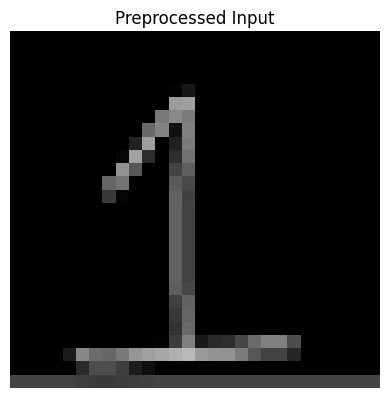

In [35]:
# Load and process the image
filename = next(iter(uploaded))  # Get uploaded filename
img = Image.open(filename).convert('L')  # Convert to grayscale

# Resize to 28x28 if needed
img = img.resize((28, 28))

# Invert colors (if white digit on black)
img = np.invert(np.array(img))

# Normalize and reshape
img = img / 255.0
img = img.reshape(1, 28, 28, 1)

# Show image
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title("Preprocessed Input")
plt.axis('off')
plt.show()

In [36]:
# Predict probabilities
prediction = model.predict(img)

# Get predicted class
predicted_digit = np.argmax(prediction)
confidence = prediction[0][predicted_digit] * 100

print(f"Predicted digit: {predicted_digit} with {confidence:.2f}% confidence")

# Show full probability distribution (optional)
for i, prob in enumerate(prediction[0]):
    print(f"{i}: {prob:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted digit: 1 with 25.87% confidence
0: 0.0882
1: 0.2587
2: 0.1386
3: 0.1310
4: 0.0729
5: 0.1011
6: 0.0504
7: 0.0649
8: 0.0340
9: 0.0601
